#### The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 
#### Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
#### Explore and analyze the data to discover key factors responsible for app engagement and success. 

In [142]:
# pip install matplotlib==3.1.0

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime

import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

In [144]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.8.0


Let's take a look at the data, which consists of two files:

#### playstore data.csv: 
***contains all the details of the applications on Google Play. There are 13 features that describe a given app.***
#### user_reviews.csv: 
***contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.***

In [145]:
df= pd.read_csv("Play Store Data.csv")
pf= pd.read_csv("User Reviews.csv")

In [146]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [147]:
pf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#### So Sentiment we already know it can be Positive , Negative, Neutral.
### SENTIMENT POLARITY - 
***it range from -1 to 1, where -1 indicates a very negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a very positive sentiment.***


In [148]:
print(pf['Sentiment_Polarity'].max())
print(pf['Sentiment_Polarity'].min())

1.0
-1.0


### SENTIMENT SUBJECTIVITY -
***it range from 0 to 1, where 0 indicates a very objective text, and 1 indicates a very subjective text. Objective texts are based on facts, evidence, or logic, while subjective texts are based on opinions, feelings, or personal views. Subjectivity scores can help you filter out irrelevant or biased texts, and focus on the ones that express genuine sentiments.***

In [149]:
print(pf['Sentiment_Subjectivity'].max())
print(pf['Sentiment_Subjectivity'].min())

1.0
0.0


In [150]:
pf['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64

In [151]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [152]:
pf.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

# **Problem Statements**

1. Which Category of apps have the most installations??
2. Which are the top most installed apps in playstore??
3. What is the effect of Rating, Type, Price on no of installations of a app??
4. Which Genres of App have most number of Installations??
5. On, which Type the most apps are build Paid or Free?? 
7. What is the effect on Rating on basis of type of an App, paid or free??
8. How does the last update has an effect on the rating?
9. How number of reviews effects the Rating of an app in Playstore??
10. How Content Rating affect over the App?  
11. What are the top categories on Google Playstore?
12. What is Distribution of apps based on its Size??
13. Distribution of Android version based on each Category??
14. What is the Percentage of Review Sentiments??
15. What are the Apps with the highest number of positive reviews & negative reviews?
16. What's the Distribution of Sentiment Subjectivity for the Playstore Applications Reviews??
17. What is Distribution of App update over the Year?

## Data Cleaning/X-ray of Data

### Play Store Data (df)

In [153]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [155]:
def playstore_func(table):
    temp= pd.DataFrame(index=table.columns)
    temp['datatype']= table.dtypes
    temp['not null']= table.count()
    temp['null']= table.isnull().sum()
    temp['% null']= table.isnull().mean()
    temp['unique']= table.nunique()
    return temp

In [156]:
playstore_func(df)

,datatype,not null,null,% null,unique
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


##### SO FOR THE TYPE , CONTENT RATING, ANDROID VER & CURRENT VER COLUMNS THE NULL VALUE %AGE IS NELIGIBLE. WE CAN REMOVE THOSE NULL VALUES FROM THOSE COLUMNS TO MAKE THE DATA MORE EFFICIENT

### Type

In [157]:
df['Type'].value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

In [158]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Here if the price is 0 for an app , then the app wiill be automatically the 'Free' type. So we can replace the value of Type here with Free.

In [159]:
df.loc[9148,'Type']='Free'

In [160]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Content Rating

In [161]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [162]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This row values are not making any sense. So its better to drop this one Null value.

In [163]:
df=df[df['Content Rating'].notna()]

In [164]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Current Ver

In [165]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

In [166]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


So for Current Ver, every application have it's own version. So we can't be sure replacing these values with mean, median will work.
And these contribute to less than 1% of total values, so we can remove them.

In [167]:
df= df[df['Current Ver'].notna()]

In [168]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Android Ver

In [169]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1373
Varies with device    1362
4.4 and up             980
2.3 and up             651
5.0 and up             601
4.2 and up             393
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             240
2.1 and up             134
1.6 and up             115
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              24
1.5 and up              19
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

Same for android version, we can't replace by mean median values. And the % null values are neligible. So we can remove those rows.

In [170]:
df=df[df['Android Ver'].notna()]

In [171]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [172]:
playstore_func(df)

,datatype,not null,null,% null,unique
App,object,10830,0,0.000000,9649
Category,object,10830,0,0.000000,33
Rating,float64,9360,1470,0.135734,39
Reviews,object,10830,0,0.000000,5999
Size,object,10830,0,0.000000,457
Installs,object,10830,0,0.000000,21
Type,object,10830,0,0.000000,2
Price,object,10830,0,0.000000,92
Content Rating,object,10830,0,0.000000,6
Genres,object,10830,0,0.000000,119


## Rating

* The `Rating` column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

In [173]:
df['Rating'].value_counts()

Rating
4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [174]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


<Axes: xlabel='Rating'>

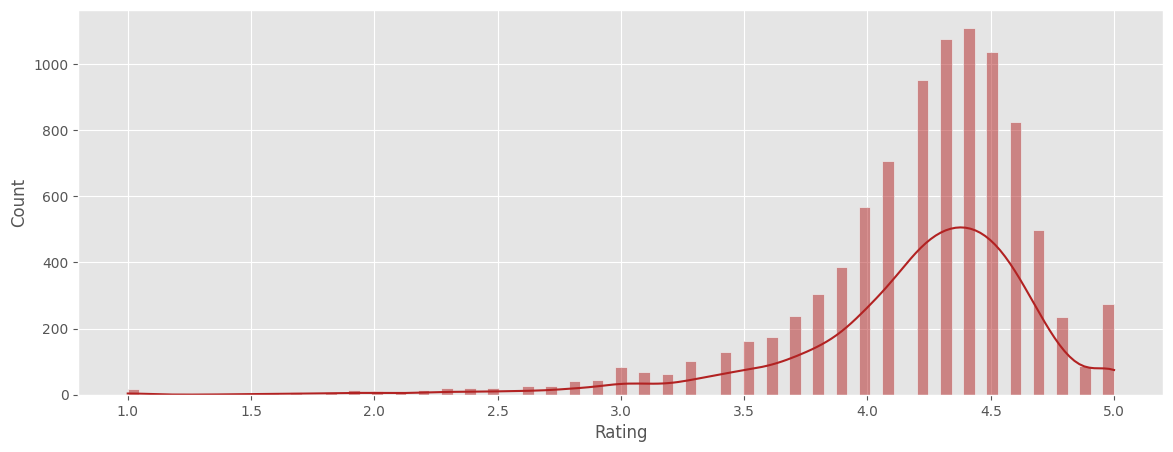

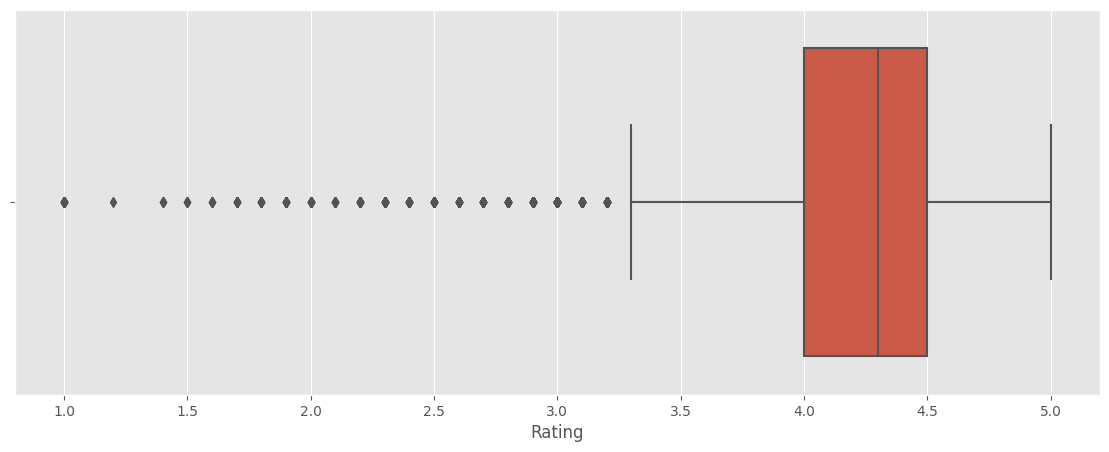

In [175]:
plt.figure(figsize=(14,5))
sns.histplot(x=df['Rating'],color='firebrick',kde=True)
plt.figure(figsize=(14,5))
sns.boxplot(x='Rating', data=df)

* Mean and Median Rating

In [176]:
mean_rating = round(df[~df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = df[~df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1918, 4.3]

* The mean of the average ratings (excluding the NaN values) comes to be 4.2.

* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the histplot visualizations, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the Rating column with its median.

In [177]:
df['Rating'].fillna(value=median_rating,inplace=True)

In [178]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Removing Duplicates and Changing the Data Types

In [179]:
df.shape

(10830, 13)

In [180]:
df['App'].value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9649, dtype: int64

In [181]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [182]:
df[df['App'] =='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [183]:
df[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [184]:
df.shape

(10830, 13)

In [185]:
df.drop_duplicates(subset='App',inplace=True)

In [186]:
df.shape

(9649, 13)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## Changing Duplicate Values

### Reviews

In [188]:
df['Reviews'].value_counts()

Reviews
0         592
1         271
2         213
3         170
4         137
         ... 
157506      1
351254      1
49211       1
88860       1
398307      1
Name: count, Length: 5328, dtype: int64

In [189]:
convert_dict={'Reviews':float}
df['Reviews']=df['Reviews'].astype(int)

In [190]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Size

In [191]:
df['Size'].value_counts()

Size
Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: count, Length: 457, dtype: int64

In [192]:
def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return None
  except:
    return None

In [193]:
df['Size']=df['Size'].apply(lambda x:convert_kb_to_mb(x) )

In [194]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [195]:
df['Size'].value_counts()

Size
12.0000    181
11.0000    181
13.0000    177
14.0000    176
15.0000    163
          ... 
0.7041       1
0.4199       1
0.4189       1
0.1953       1
0.6045       1
Name: count, Length: 455, dtype: int64

In [196]:
# df['Size'].replace('Varies with device',df['Size'].replace(['Varies with device'],[None]))

In [197]:
# df['Size']=df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
# df['Size']=df['Size'].apply(lambda x: float(x))

In [198]:
df['Size'].value_counts()

Size
12.0000    181
11.0000    181
13.0000    177
14.0000    176
15.0000    163
          ... 
0.7041       1
0.4199       1
0.4189       1
0.1953       1
0.6045       1
Name: count, Length: 455, dtype: int64

A vast majority of the entries in the Size column contain the entry Varies with device. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column.

In [199]:
mean_s= round(df[df['Size']!='Varies with device']['Size'].mean(),4)
median_s=df[df['Size']!='Varies with device']['Size'].median()
max_s=df[df['Size']!='Varies with device']['Size'].max()
min_s=df[df['Size']!='Varies with device']['Size'].min()

[mean_s, median_s, max_s, min_s]

[20.4136, 12.0, 100.0, 0.0083]

**Visualization of distribution of `**Size**` using displot and detecting the outliers through boxplot.**

<Axes: xlabel='Size'>

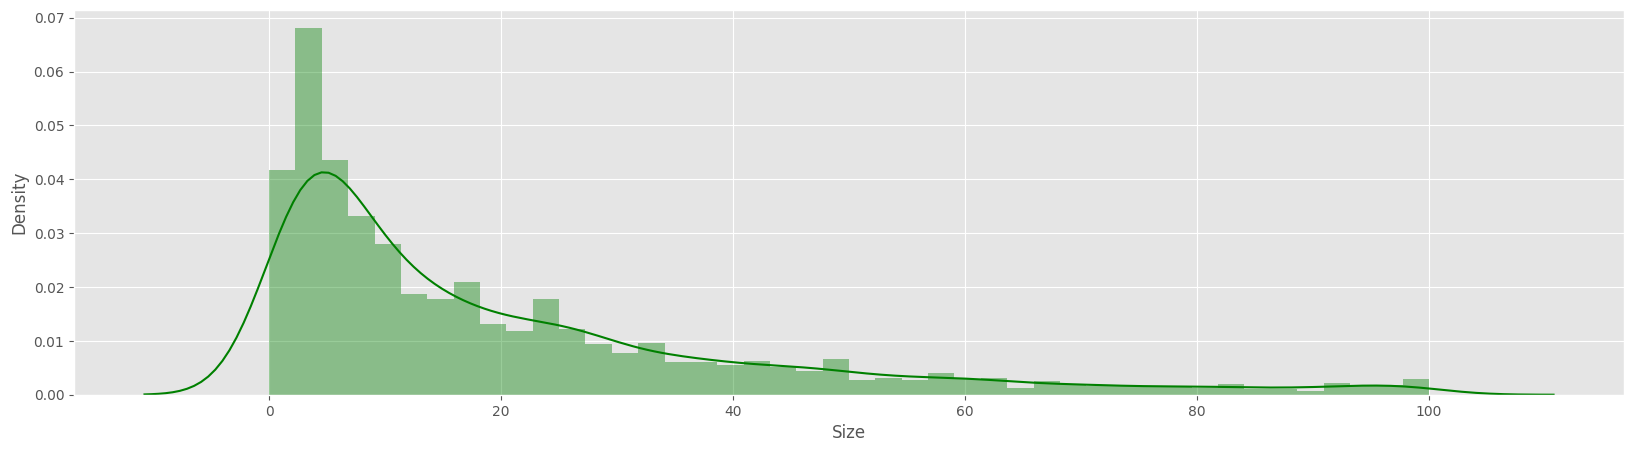

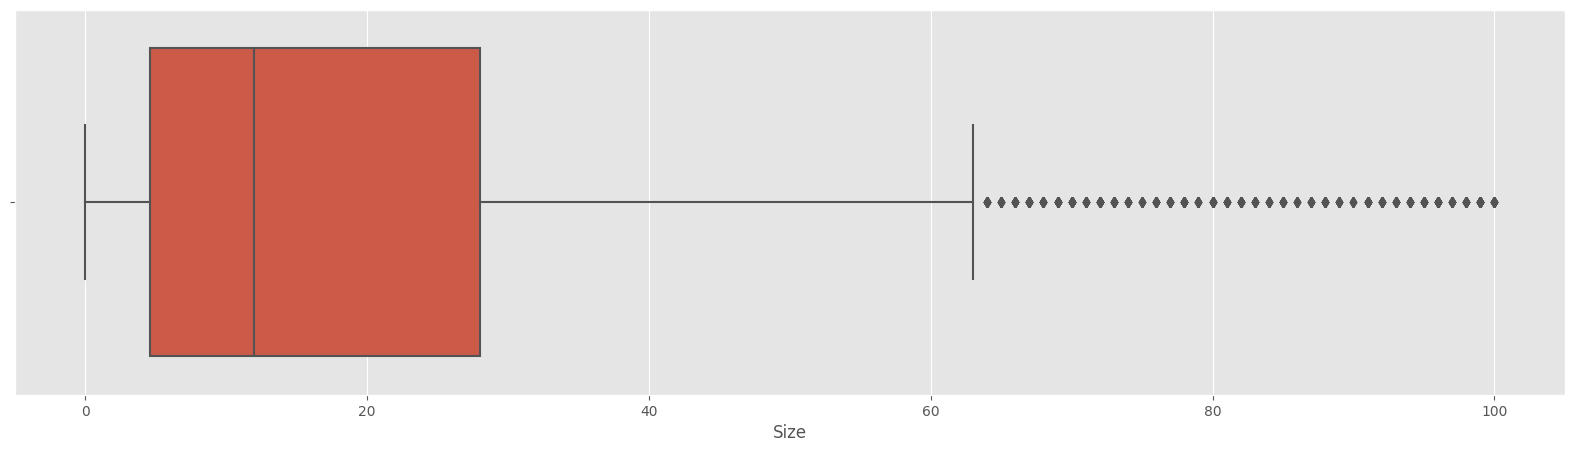

In [200]:
plt.figure(figsize=(20,5))
sns.distplot(df[df['Size']!='Varies with device']['Size'], color='green')
plt.figure(figsize=(20,5))
sns.boxplot(x='Size', data=df)

* It is clear from the visualizations that the data in the **Size** column is skewed towards the right.
* Also, we see that a vast majority of the entries in this column are of the value **Varies with device**, replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

* We have successfully converted all the valid entries in the **Size** column to a single unit of measure (MB) and the datatype from string to float.

In [201]:
df.shape

(9649, 13)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int32  
 4   Size            8422 non-null   float64
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1017.7+ KB


## Installs

In [203]:
df['Installs'].value_counts()

Installs
1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: count, dtype: int64

In [204]:
def install_func(val):
    
    if ',' and '+' in val:
        new = int(val[:-1].replace(',',''))
        return new
    elif '+' in val:
        new= int(val[:-1])
        return new
    else:
        return int(val)  

In [205]:
df['Installs']=df['Installs'].apply(lambda x: install_func(x))

In [206]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int32  
 4   Size            8422 non-null   float64
 5   Installs        9649 non-null   int64  
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 1017.7+ KB


## Price

In [208]:
df['Price'].value_counts()

Price
0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [209]:
def price_func(val):
    if '$' in val:
        return float(val[1:])
    else:
        return float(val)

In [210]:
df['Price']=df['Price'].apply(lambda x: price_func(x))

In [211]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Last Updated	

In [212]:
df['Last Updated']= pd.to_datetime(df['Last Updated'])

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int32         
 4   Size            8422 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 1017.7+ KB


##  ***User Review Data (pf)***

In [214]:
pf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [215]:
playstore_func(pf)

,datatype,not null,null,% null,unique
App,object,64295,0,0.000000,1074
Translated_Review,object,37427,26868,0.417886,27994
Sentiment,object,37432,26863,0.417809,3
Sentiment_Polarity,float64,37432,26863,0.417809,5410
Sentiment_Subjectivity,float64,37432,26863,0.417809,4474


#### So here for Duplicate Values we know a single app can have multiple Translated_Review. Multiple apps can have multiple same translated_review, sentiment, polarity and subjectivity. 
**So we will not be dealing with Duplicate Values here**


**For Datatype all the columns have required datatypes. So let's see the Null values here**

In [216]:
pf.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns `Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity` in the majority of the cases.

**Lets check if there are any exceptions.**

In [217]:
pf[pf['Translated_Review'].isnull() & pf['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

So in total, we can remove all the null values as it will not be giving us any information at all

In [218]:
pf.shape

(64295, 5)

In [219]:
pf=pf.dropna()

In [220]:
pf.shape

(37427, 5)

There are a total of 37427 rows in the updated df.

Hence we have taken care of all the NaN values in the df.

Lets inspect the updated df

In [221]:
pf['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

# **Problem Statements**

1. Which Category of apps have the most installations??
2. Which are the top most installed apps in playstore??
3. What is the effect of Rating, Type, Price on no of installations of a app??
4. Which Genres of App have most number of Installations??
5. Distribution of Rating over Playstore Apps??
6. On, which Type the most apps are build Paid or Free?? 
7. What is the effect on Rating on basis of type of a app, paid or free??
8. How does the last update has an effect on the rating?
9. How number of reviews effects the Rating of an app in Playstore??  //
10. How Content Rating affect over the App?  
11. What are the top categories on Google Playstore?
12. What is Distribution of apps based on its Size??
13. Distribution of Android version based on each Category??
14. What is the distribution of Installs and Adroid Version??
15. What is the Percentage of Review Sentiments??
16. What are the Apps with the highest number of positive reviews & negative reviews?
17. What's the Distribution of Sentiment Subjectivity for the Playstore Applications Reviews??
18. What is Distribution of App update over the Year?
19. What is the distribution of App Installations over the Last Updated years??

# **Data Visualization on Play Store data:**
We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.



### Which Category of apps have the most installations??

In [222]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [223]:
df['Category'].value_counts()

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [224]:
df_n =df.groupby('Category')['Installs'].sum().reset_index()
df_n = df_n.sort_values('Installs', ascending=False)
df_n

,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001271905
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427881405
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


In [225]:
# sns.set_style("whitegrid", {'axes.grid' : False})
# sns.displot(x='Installs', data=df,col="Category", hue="Category")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'PRODUCTIVITY'),
  Text(4, 0, 'SOCIAL'),
  Text(5, 0, 'PHOTOGRAPHY'),
  Text(6, 0, 'FAMILY'),
  Text(7, 0, 'VIDEO_PLAYERS'),
  Text(8, 0, 'TRAVEL_AND_LOCAL'),
  Text(9, 0, 'NEWS_AND_MAGAZINES'),
  Text(10, 0, 'ENTERTAINMENT'),
  Text(11, 0, 'BOOKS_AND_REFERENCE'),
  Text(12, 0, 'PERSONALIZATION'),
  Text(13, 0, 'SHOPPING'),
  Text(14, 0, 'HEALTH_AND_FITNESS'),
  Text(15, 0, 'SPORTS'),
  Text(16, 0, 'BUSINESS'),
  Text(17, 0, 'LIFESTYLE'),
  Text(18, 0, 'MAPS_AND_NAVIGATION'),
  Text(19, 0, 'FINANCE'),
  Text(20, 0, 'WEATHER'),
  Text(21, 0, 'EDUCATION'),
  Text(22, 0, 'FOOD_AND_DRINK'),
  Text(23, 0, 'DATING'),
  Text(24, 0, 'ART_AND_DESIGN'),
  Text(25, 0, 'HOUSE_AND_HOME'),
  Text(26, 0, 'AUTO_AND_VEHICLES'),
  Text(27, 0, 'LIBRARIES_AND_DEMO'),
  T

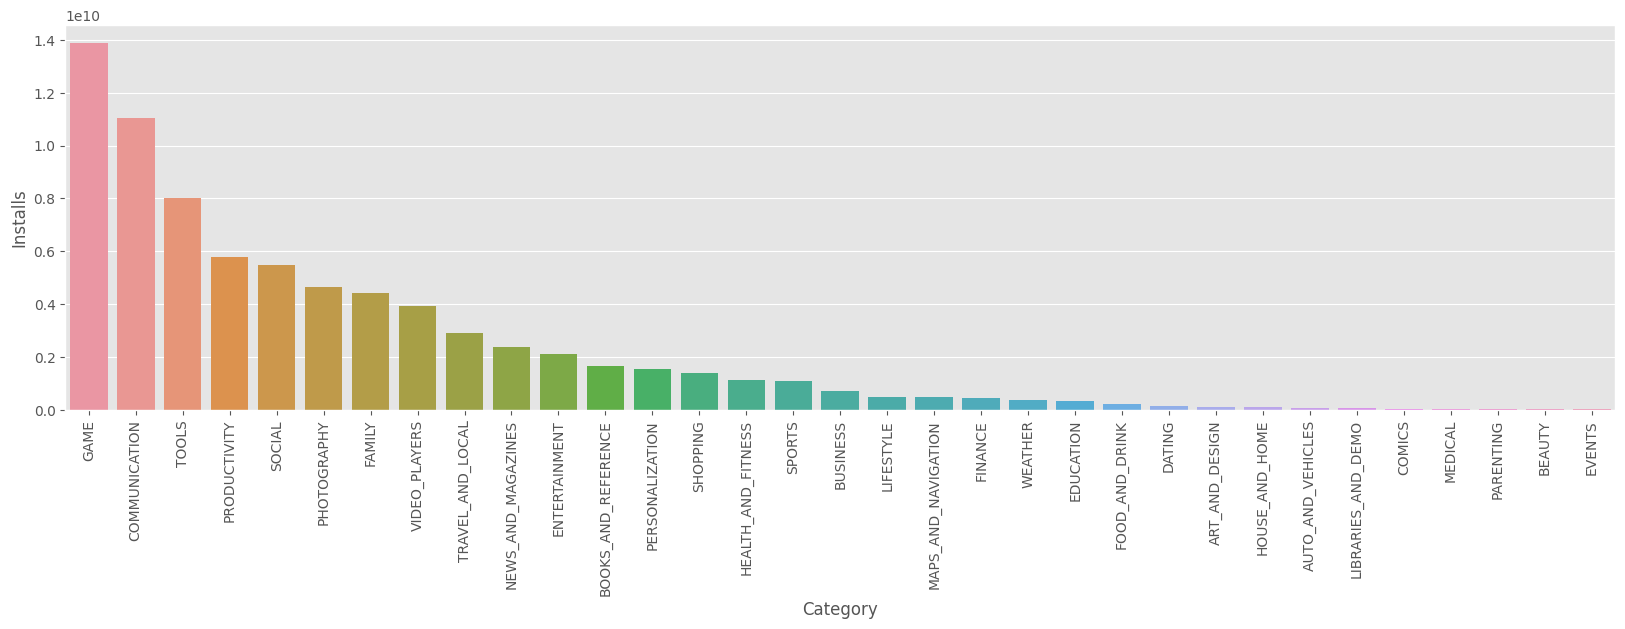

In [226]:
plt.figure(figsize=(20,5))
sns.barplot(x='Category', y='Installs', data=df_n,ci=None)
plt.xticks(rotation=90)

In [227]:
df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 9649, dtype: object

**FROM THE ABOVE GRAPH, WE CAN SAY THE MOST INSTALLED APPS ARE OF Game & then Communication CATEGORY.**

## Which are the top most installed apps in playstore??

In [228]:
df1=df.nlargest(n=10, columns=['Installs'])

In [229]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


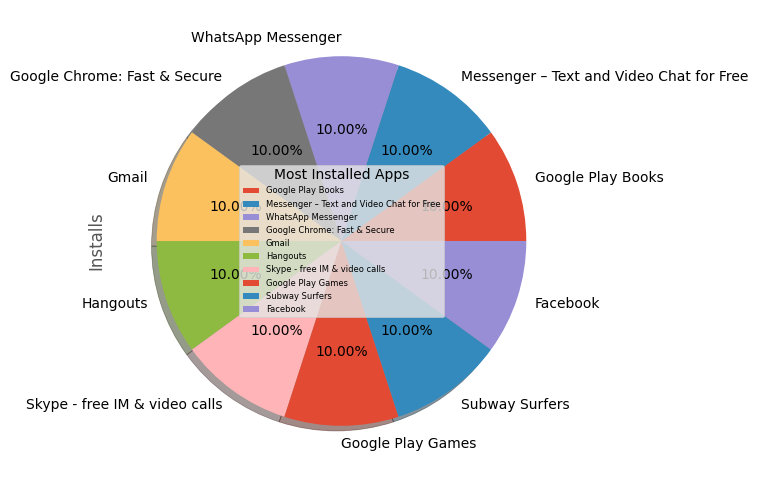

In [230]:
df1['Installs'].plot(kind='pie', labels=df1['App'],shadow=True, autopct='%4.2f%%',figsize=(10,6))
plt.legend(title='Most Installed Apps', loc='center', fontsize=6)
# plt.figure()

plt.show()

**SO WE FOUND THE TOP MOST INSTALLED APPS ARE AS ABOVE MENTIONED. ALL THESE APPS HAVE '1 BILLION' INSTALLS.**

## What is the effect of Rating, Reviews, Price on no of installations of a app??

In [231]:
df_int=df[['Rating','Reviews','Size','Installs','Price']]

In [232]:
df_int.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050212,0.045528,0.034306,-0.018674
Reviews,0.050212,1.000000,0.179275,0.625158,-0.007603
Size,0.045528,0.179275,1.000000,0.134216,-0.022494
Installs,0.034306,0.625158,0.134216,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.022494,-0.009412,1.000000


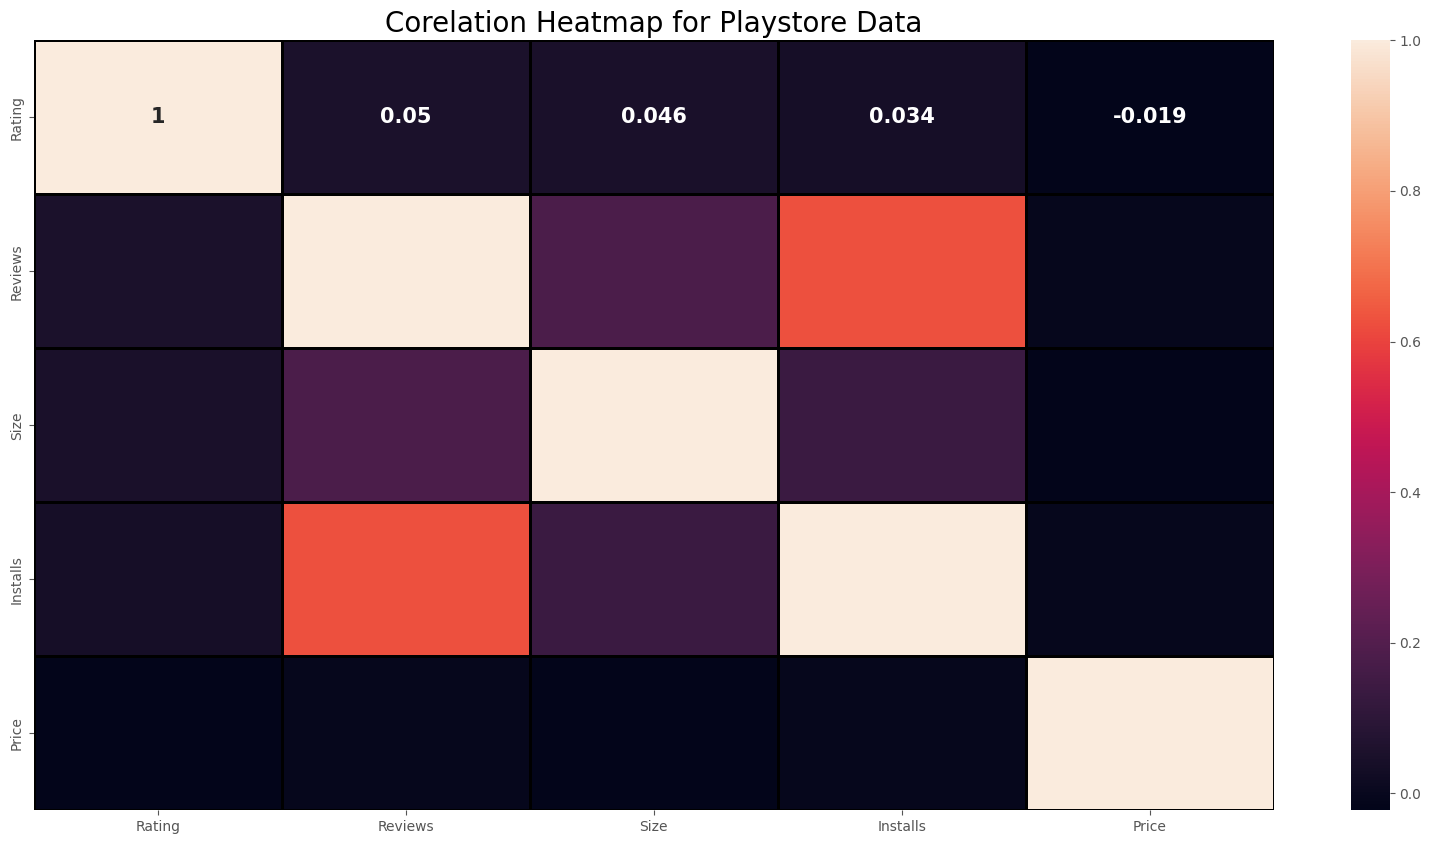

In [233]:
# plt.ylim(bottom, top)
plt.figure(figsize = (20,10))
sns.heatmap(df_int.corr(), annot= True, annot_kws=dict(size=15, weight='bold'),linewidth=0.8, linecolor='black')
plt.title('Corelation Heatmap for Playstore Data', size=20)
plt.show()

* There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The` Price `is slightly negatively correlated with the `Rating, Reviews, and Installs.` This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* The` Rating` is slightly positively correlated with the` Installs and Reviews` column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

## Which Genres of App have most number of Installations??

In [234]:
df['Genres'].value_counts()

Genres
Tools                              824
Entertainment                      560
Education                          509
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: count, Length: 118, dtype: int64

In [235]:
top_genres =df.groupby('Genres')['Installs'].sum().reset_index()
top_genres=top_genres.sort_values('Installs',ascending=False)
top_genres= top_genres.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Communication'),
  Text(1, 0, 'Tools'),
  Text(2, 0, 'Productivity'),
  Text(3, 0, 'Social'),
  Text(4, 0, 'Photography'),
  Text(5, 0, 'Video Players & Editors'),
  Text(6, 0, 'Arcade'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Casual'),
  Text(9, 0, 'Entertainment')])

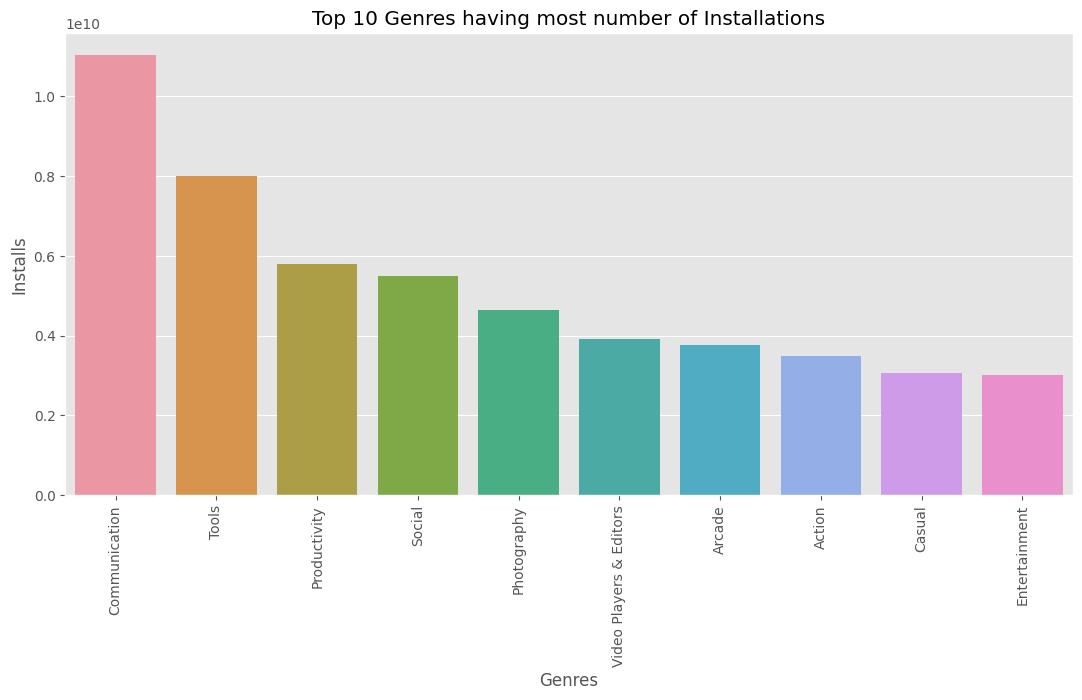

In [236]:
plt.figure(figsize=(13,6))
sns.barplot(x='Genres', y='Installs', data=top_genres)
plt.title('Top 10 Genres having most number of Installations')
plt.xticks(rotation=90)

***From the above plot we can see the 'Communication' Genre Category have the most numnber of Installations. Leading back is the 'Tools' Genre. So making a app on basis of these Genres can be a better decision.***

## On Which Type the most apps are build Paid or Free??

(0.0, 10000.0)

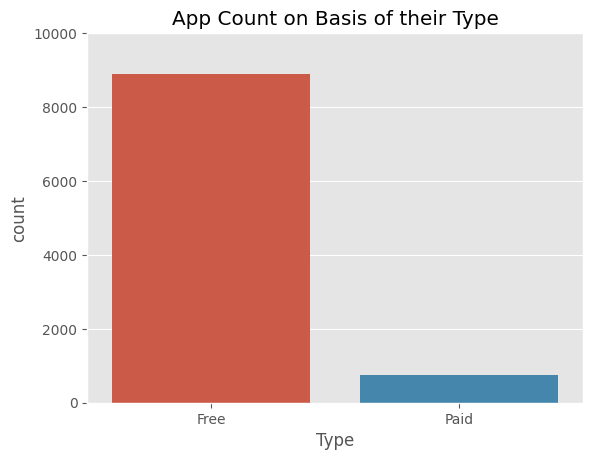

In [237]:
sns.countplot(x='Type', data=df)
plt.title('App Count on Basis of their Type')
plt.ylim(0,10000)
# plt.legend(x[0], x[1])

***From the above we can see, most of the Apps in Playstore are of 'Free' type. Only a small amount, approximately 10% of apps are of 'Paid' type.***

## Distribution of Rating over Playstore Apps??

In [238]:
def rat_func(val):
    if val<2:
        return '1-2'
    elif val>=2 and val<3:
        return '2-3'
    elif val>=3 and val<4:
        return '3-4'
    elif val>=4 and val<5:
        return '4-5'
    else:
        return '5++'

In [239]:
df['Rating_vise']=df['Rating'].apply(lambda x: rat_func(x))


In [240]:
df_n= df.groupby('Rating_vise')['App'].count().reset_index()
df_n

,Rating_vise,App
0,1-2,54
1,2-3,225
2,3-4,1630
3,4-5,7469
4,5++,271


Text(0.5, 1.0, 'Rating wise App Count')

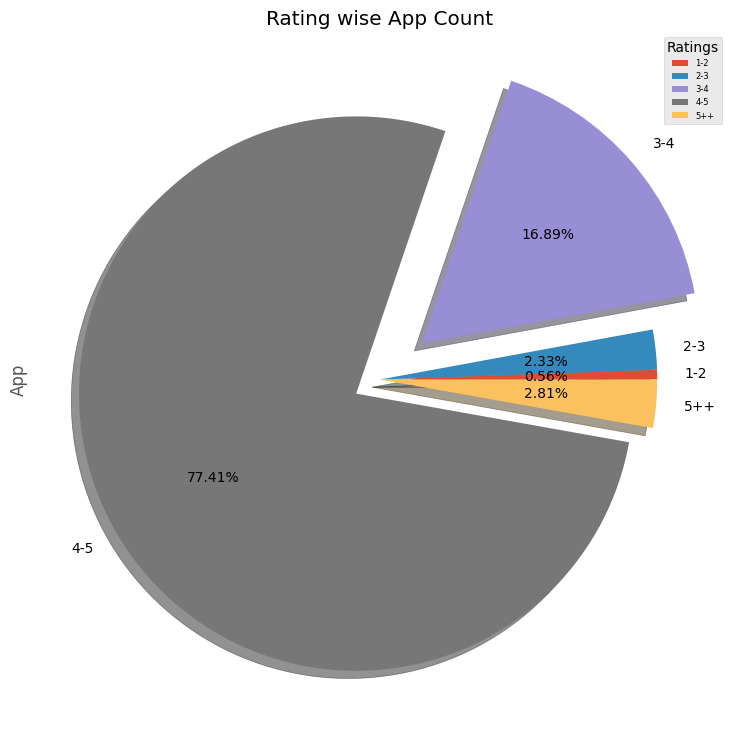

In [241]:
df_n['App'].plot(kind='pie', shadow=True, labels=df_n['Rating_vise'], autopct='%4.2f%%',figsize=(14,9),explode=[0.0,0.0,0.2,0.1,0.0])
plt.legend(title='Ratings', loc='upper right', fontsize=6)
plt.title('Rating wise App Count')

So, Most of the Apps have a rating range between 4 and 5. 

## What is the effect on Rating on basis of type of a app, paid or free??

In [242]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_vise
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4-5
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3-4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4-5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4-5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4-5


In [243]:
df_t= df[['Type','Rating']]
# df_t

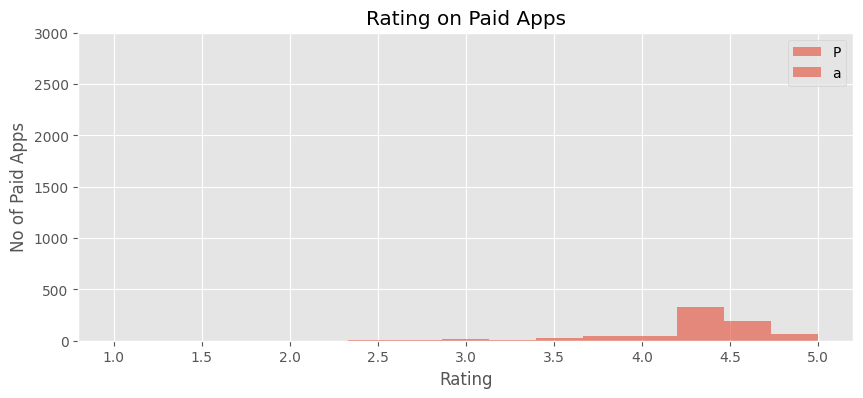

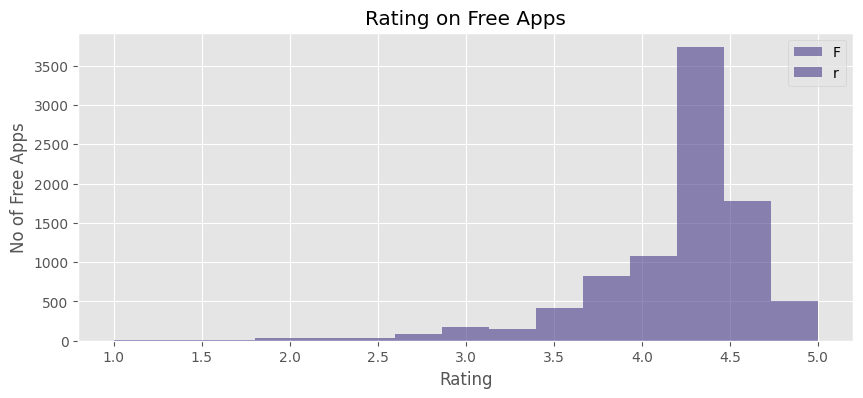

In [244]:
# count, bin_edges = np.histogram(df_t, 15)
df_t[df_t['Type']=='Paid'].plot(kind='hist', bins=15, stacked=True, alpha=0.6, figsize=(10, 4), ylim=(0,3000)) 
plt.xlabel('Rating')
plt.ylabel('No of Paid Apps')
plt.title('Rating on Paid Apps')
plt.legend('Paid')
# rotate the xticks(labelled points on x-axis) by 90 degrees
df_t[df_t['Type']=='Free'].plot(kind='hist', bins=15, stacked=True, alpha=0.6, figsize=(10, 4),color=['darkslateblue'])
plt.xlabel('Rating')
plt.ylabel('No of Free Apps')
plt.title('Rating on Free Apps')
plt.legend('Free')

***Since the number of Free Apps are More Hence they have higher number of Ratings as comparison to Paid Apps.***
###### -So a Free Type App will have higher number of ratings.
###### -One more point, if we see the least rating for both Type Apps, Free type apps have ratings less than 1.5 also. 
###### -But in case of Paid Apps, the least rated Apps have rating more than 2.0.
###### -So Free Apps are Installed & Rated more but they have apps with less rating also.

## How does the last update has an effect on the rating?

In [245]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_vise
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4-5
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3-4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4-5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4-5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4-5


In [246]:
df_t=df[['Last Updated','Rating']]
# df_t

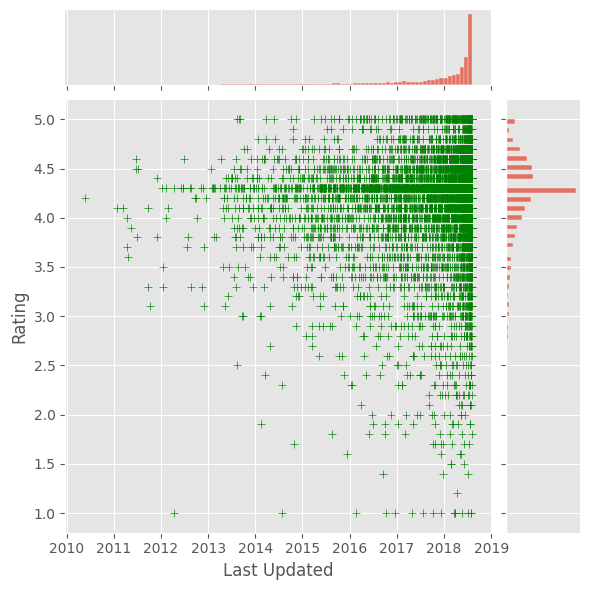

In [247]:
# plt.title('Rating of Applications on Basis of Last Updated Year')
sns.jointplot(y='Rating', x='Last Updated', data=df_t, palette='autumn',joint_kws=dict(marker='+',color='green'))
# plt.figure(figsize=(60,2))

# plt.ylim()

In [248]:
df_t=df_t.sort_values('Rating', ascending=True).reset_index()
# df_n= df_t[['Rating']]


<Axes: title={'center': 'Rating of Applications on Basis of Last Updated Year'}, xlabel='Last Updated', ylabel='Count'>

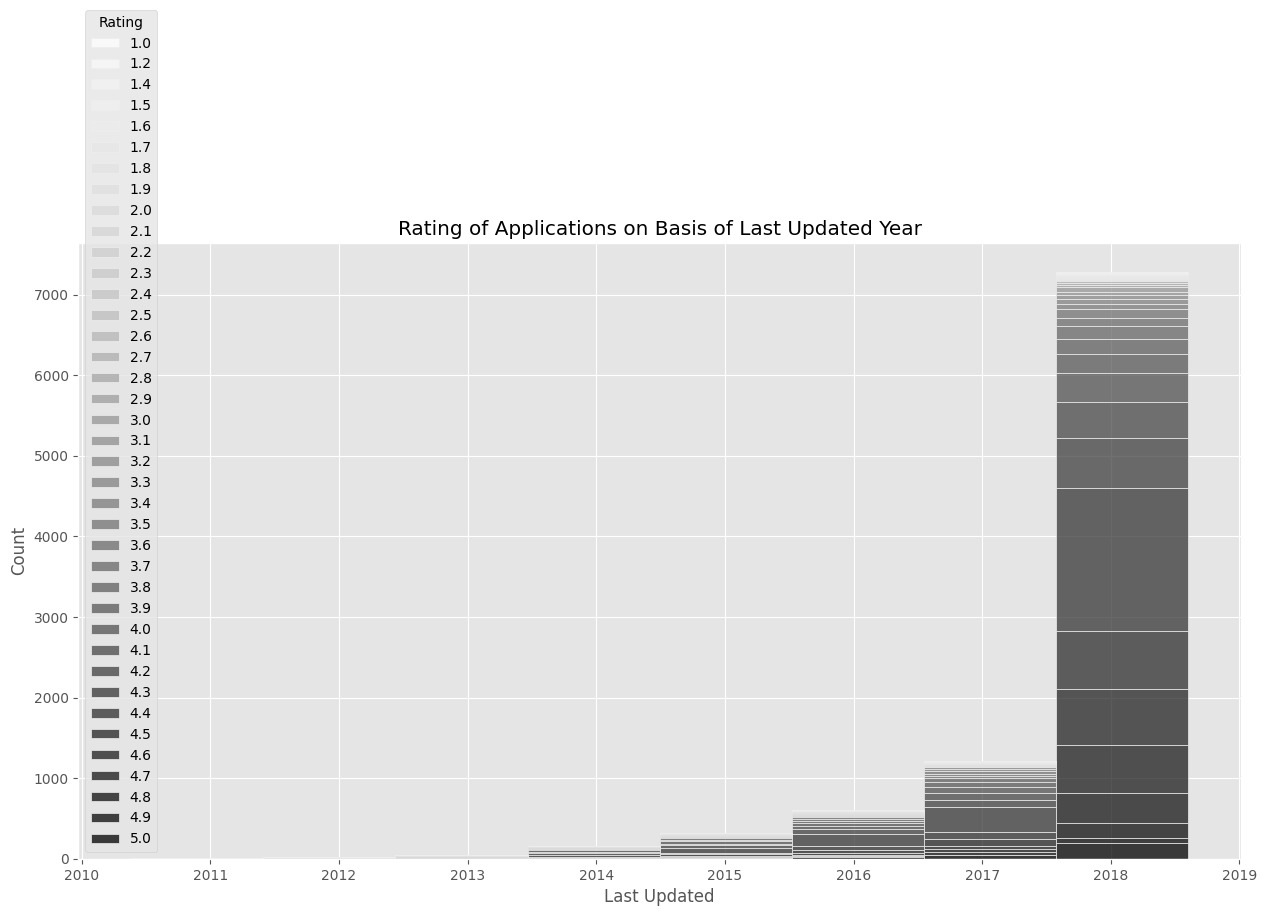

In [249]:
plt.figure(figsize=(15,8))
plt.title('Rating of Applications on Basis of Last Updated Year')
sns.histplot(data=df_t,x='Last Updated',hue='Rating',multiple='stack', bins=8, palette='Greys')
# plt.legend(labels=df_n['Rating'], loc='upper left', fontsize=7) 
# ax.figure(figsize=(18,6))
# plt.set_size_inches(11.7, 8.27)

##### FROM THE ABOVE TWO PLOTS WE CAN CONCLUDE THAT THE MORE RECENT THE 'Last Updated' YEAR IS, THE MORE 'Rating' THE APP WILL HAVE. AND THE MORE LATEST UPDATED THE APP WILL BE THE BETTER THE RATINGS WILL BE FOR THE APPS.

## How Content Rating affect over the App?  

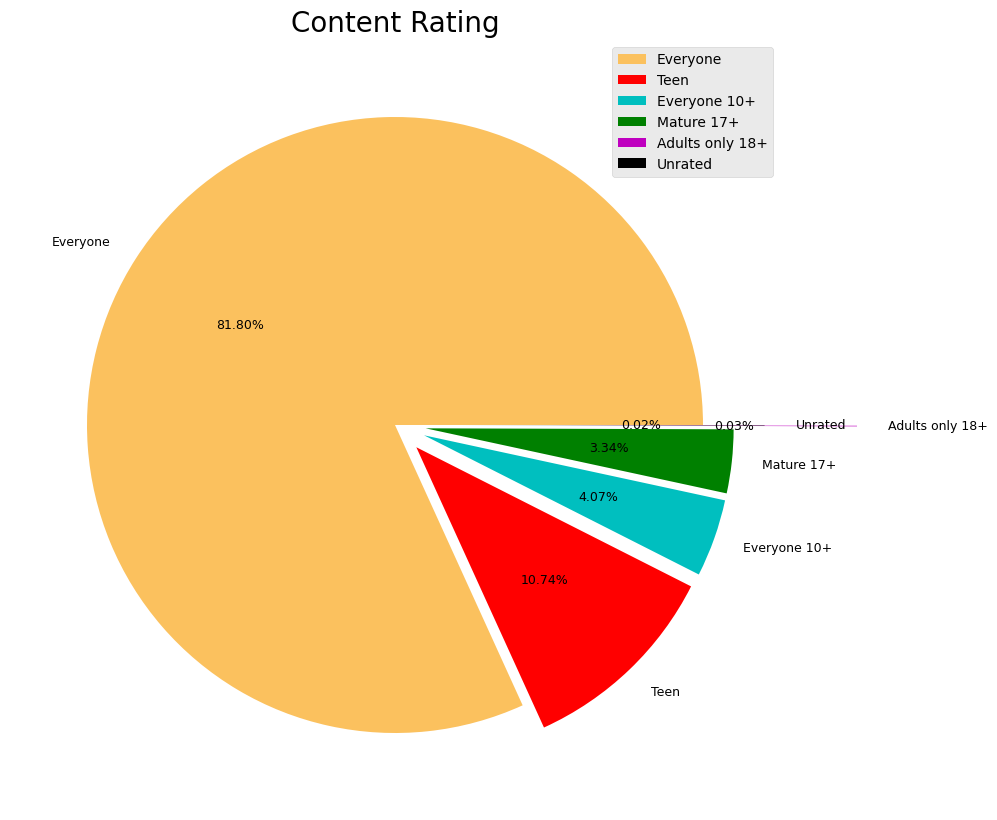

In [252]:
data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.5,0.2)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 9})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

## What are the top categories on Google Playstore?¶

In [253]:
df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [254]:
x = df['Category'].value_counts()
y = df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

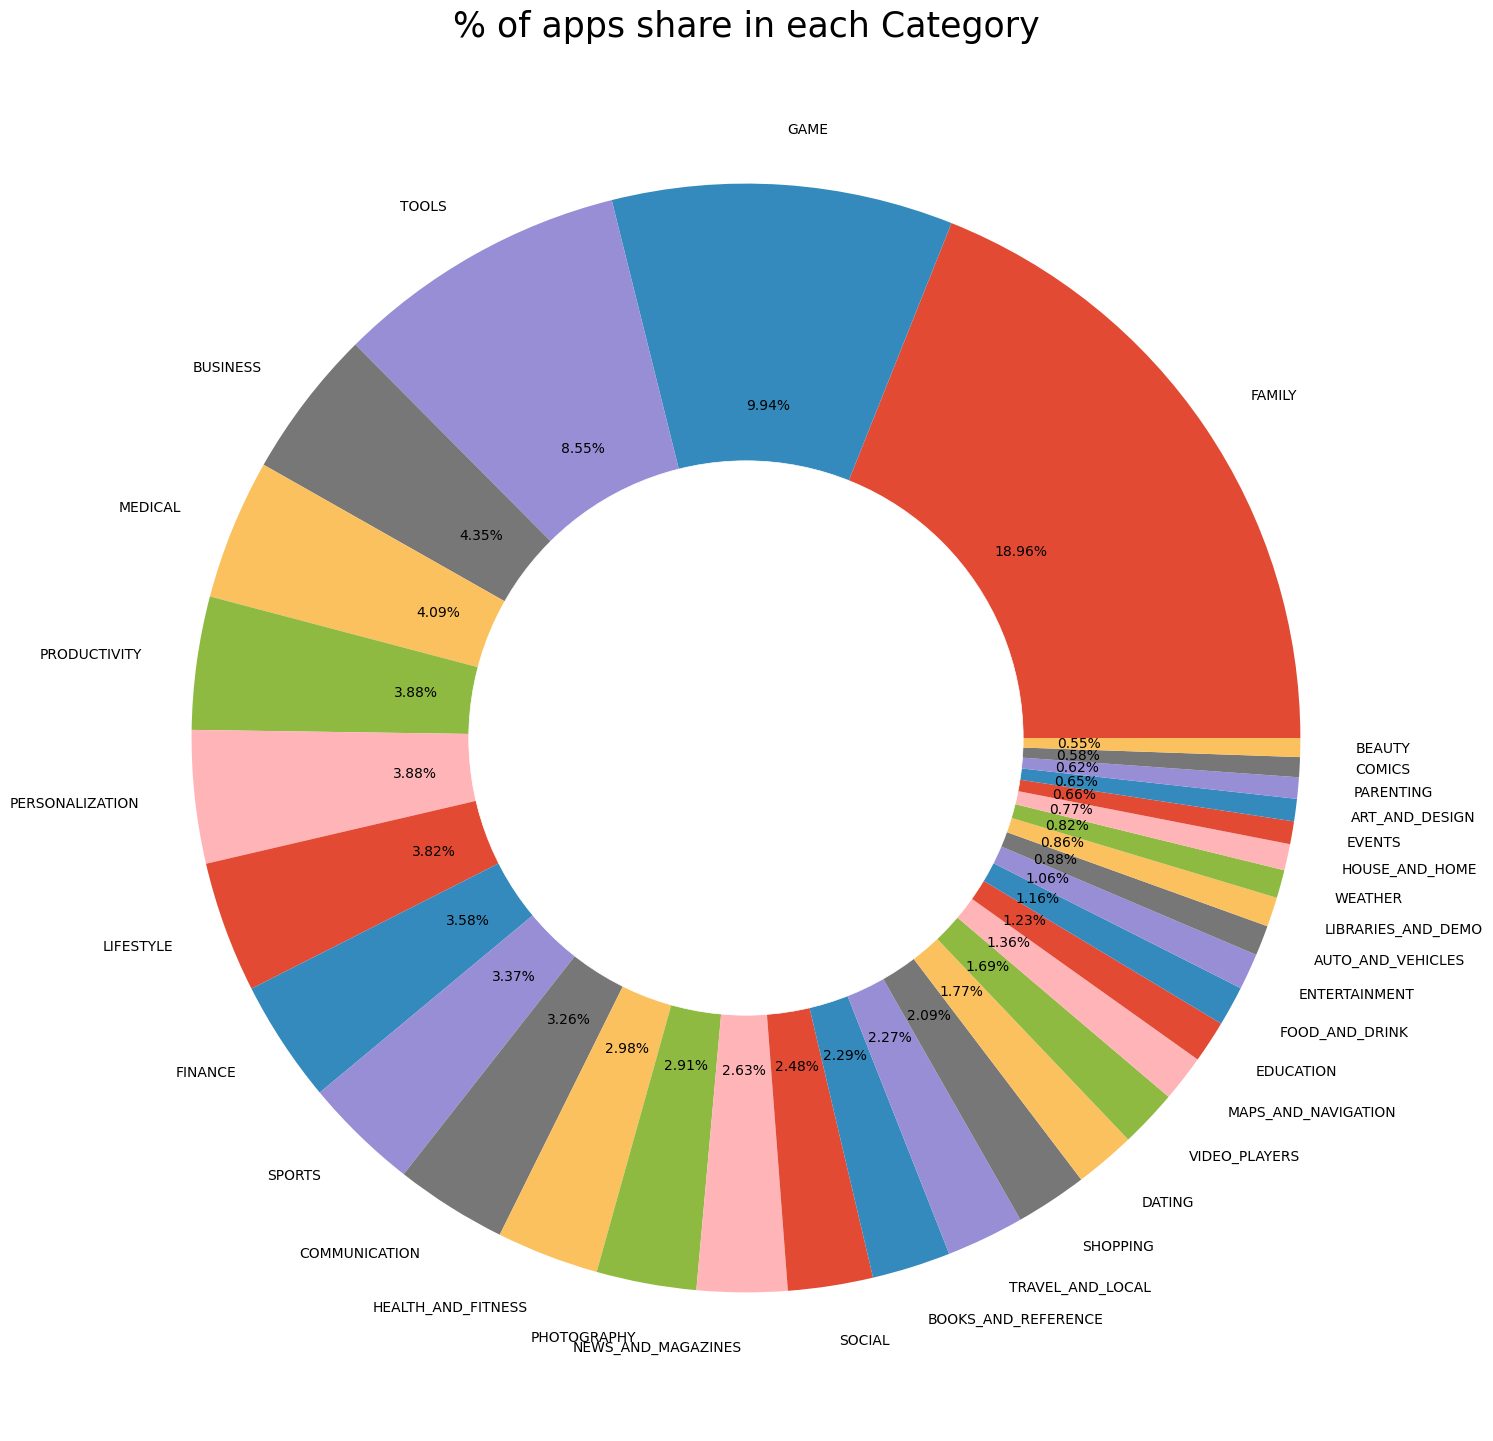

In [255]:
plt.figure(figsize=(18,18))
plt.pie(df.Category.value_counts(), labels=df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under` FAMILY & GAME` category and least are of `EVENTS & BEAUTY` Category.

## What is Distribution of apps based on its Size??

In [256]:
[max_s,min_s,median_s]

[100.0, 0.0083, 12.0]

*   The size of an app in our database varies from 100 MB to 0.0083 MB.
We can analyse the size of the apps if we can group them into certain intervals.

*   We have already established that the data in the numeric values in the 'Size' column are skewed towards the left.
*   Lets group the data in the size column as follows into intervals of 10 each:

(< 1 MB, 1-10, 10-20, 20-30, ..., 90-100, 'Varies with device')

In [257]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    elif var>= 90:
      return '90 and above'
  except:
    return var

In [258]:
df['size_group']=df['Size'].apply(lambda x : size_apps(x))
# df.head()

In [259]:
df[df['Size']<50].groupby('size_group')['App'].count()

size_group
1-10       3475
10-20      1548
20-30      1105
30-40       621
40-50       451
Below 1     310
Name: App, dtype: int64

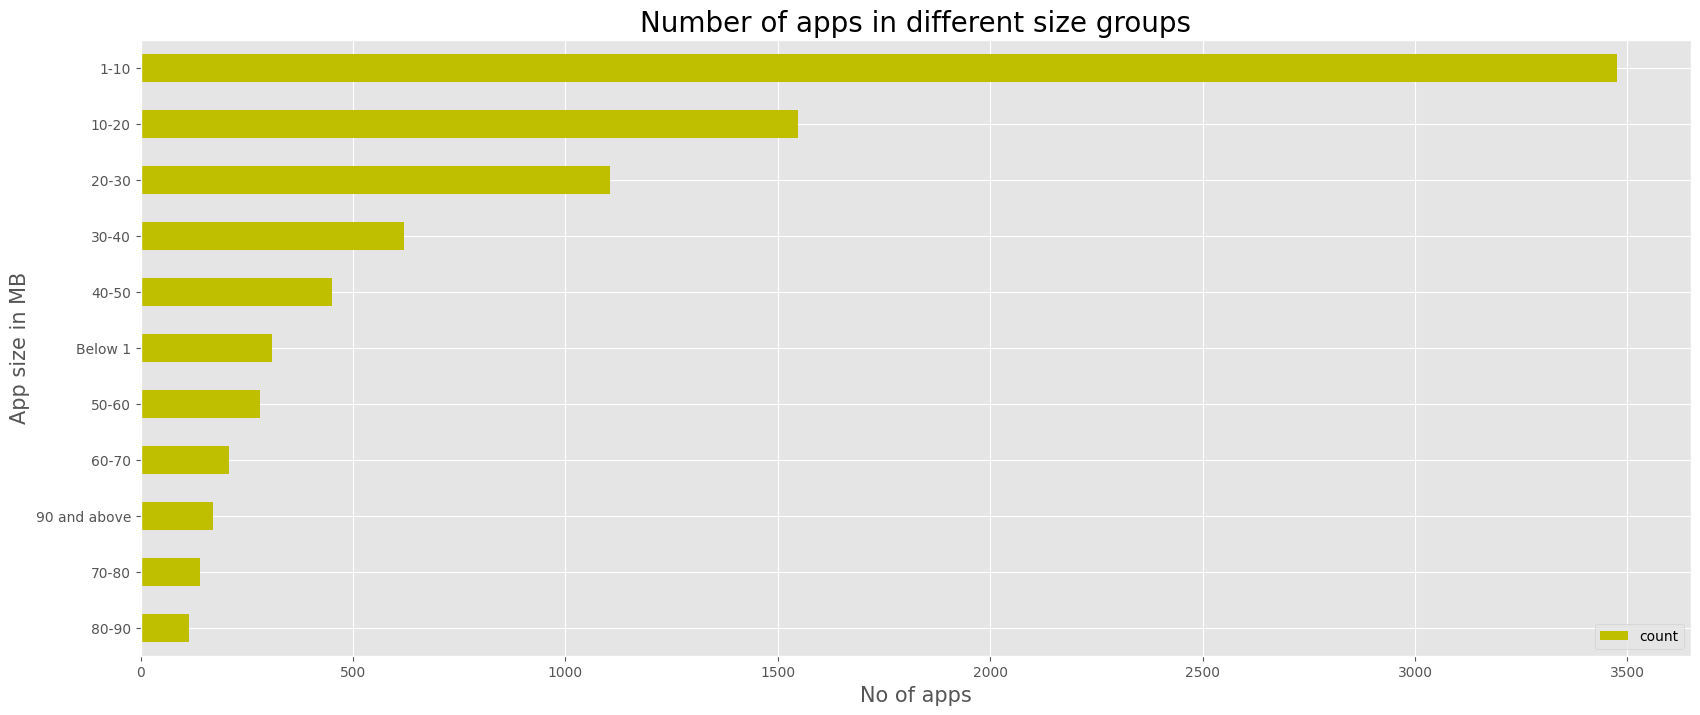

In [260]:
# no of apps belonging to each size group
df['size_group'].value_counts().plot.barh(figsize=(20,8),color='y').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

Most of The Apps in Playstore are smaller in size. We can see the Most of the apps are below the size of 20 MB.

## Distribution of Android version based on each Category??

In [261]:
df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df['Android Ver'].fillna('1.0', inplace=True)

Category        Android Ver
ART_AND_DESIGN  4.0            50
                2.0             9
                3.0             2
                5.0             1
                1.0             1
                               ..
WEATHER         4.0            38
                1.0            23
                2.0            10
                5.0             7
                3.0             1
Name: count, Length: 199, dtype: int64


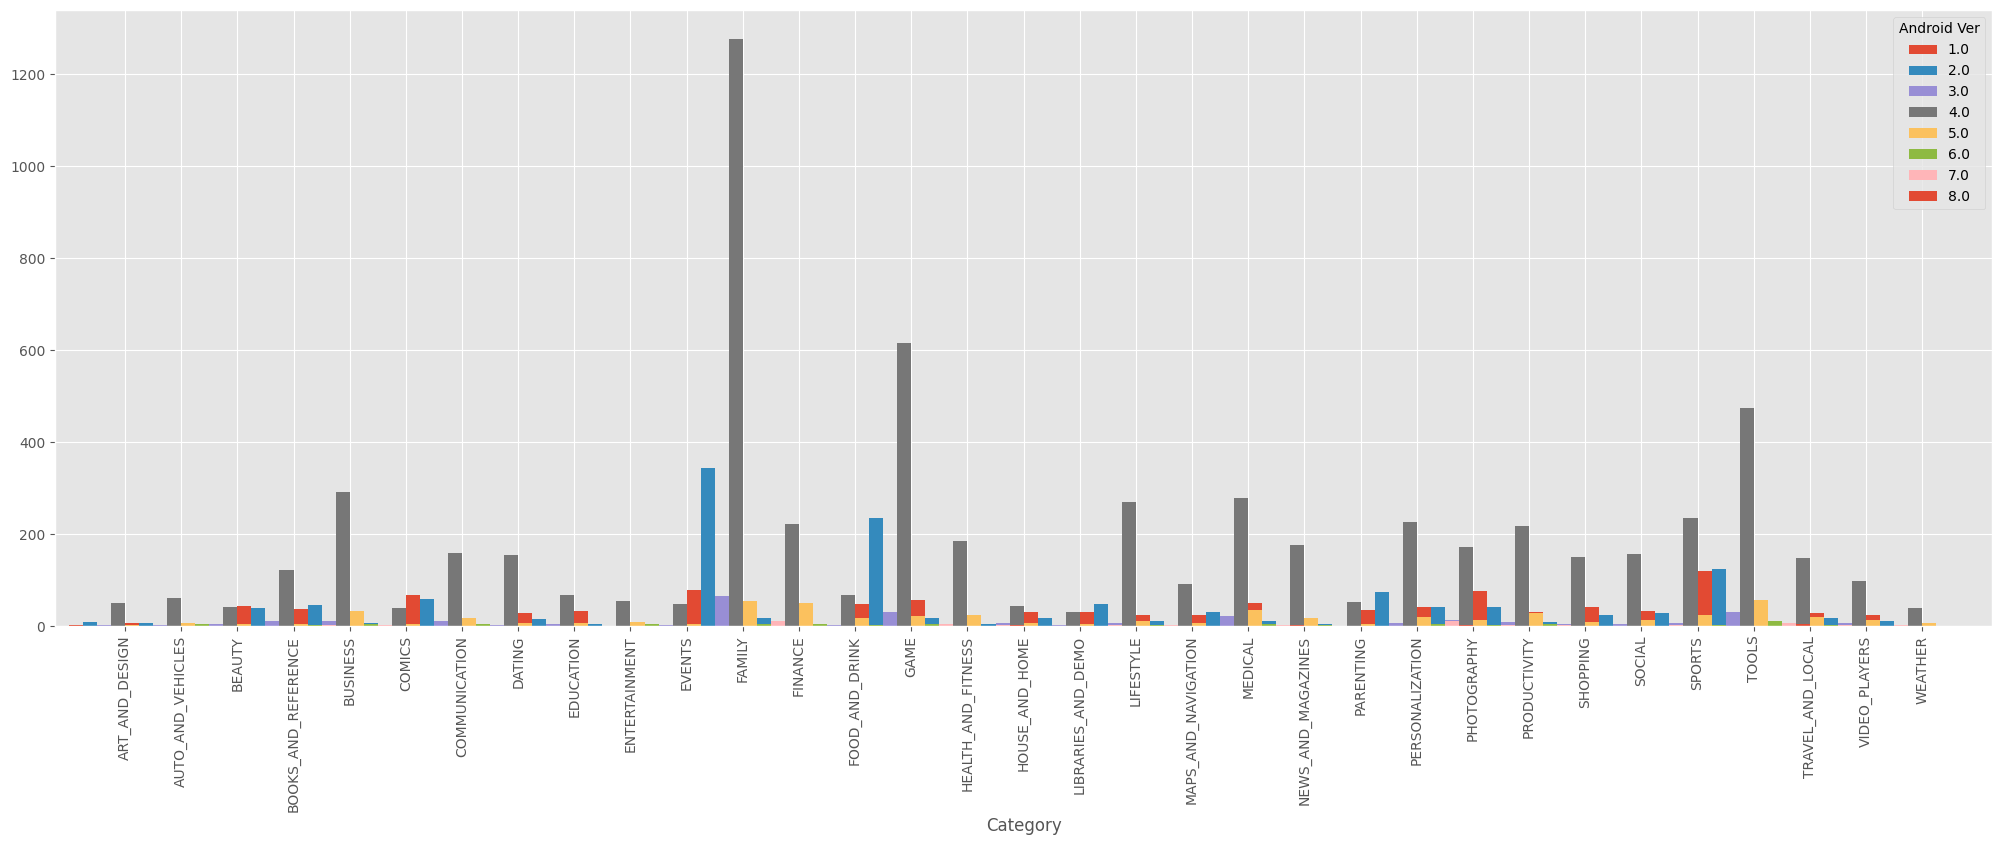

In [262]:
print(df.groupby('Category')['Android Ver'].value_counts())
Type_cat = df.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,8), width=2)
plt.xticks()
plt.show()

It is clearly evident from the above plot that majority of the apps are working on **`Android_Ver 4.0 and up`**.

## What is the distribution of Installs and Adroid Version??

Android Ver
1.0    39148934044
4.0    30681045821
2.0     2782474476
5.0     1648238108
3.0      480951871
7.0      325559600
6.0       52646391
8.0        1510106
Name: Installs, dtype: int64


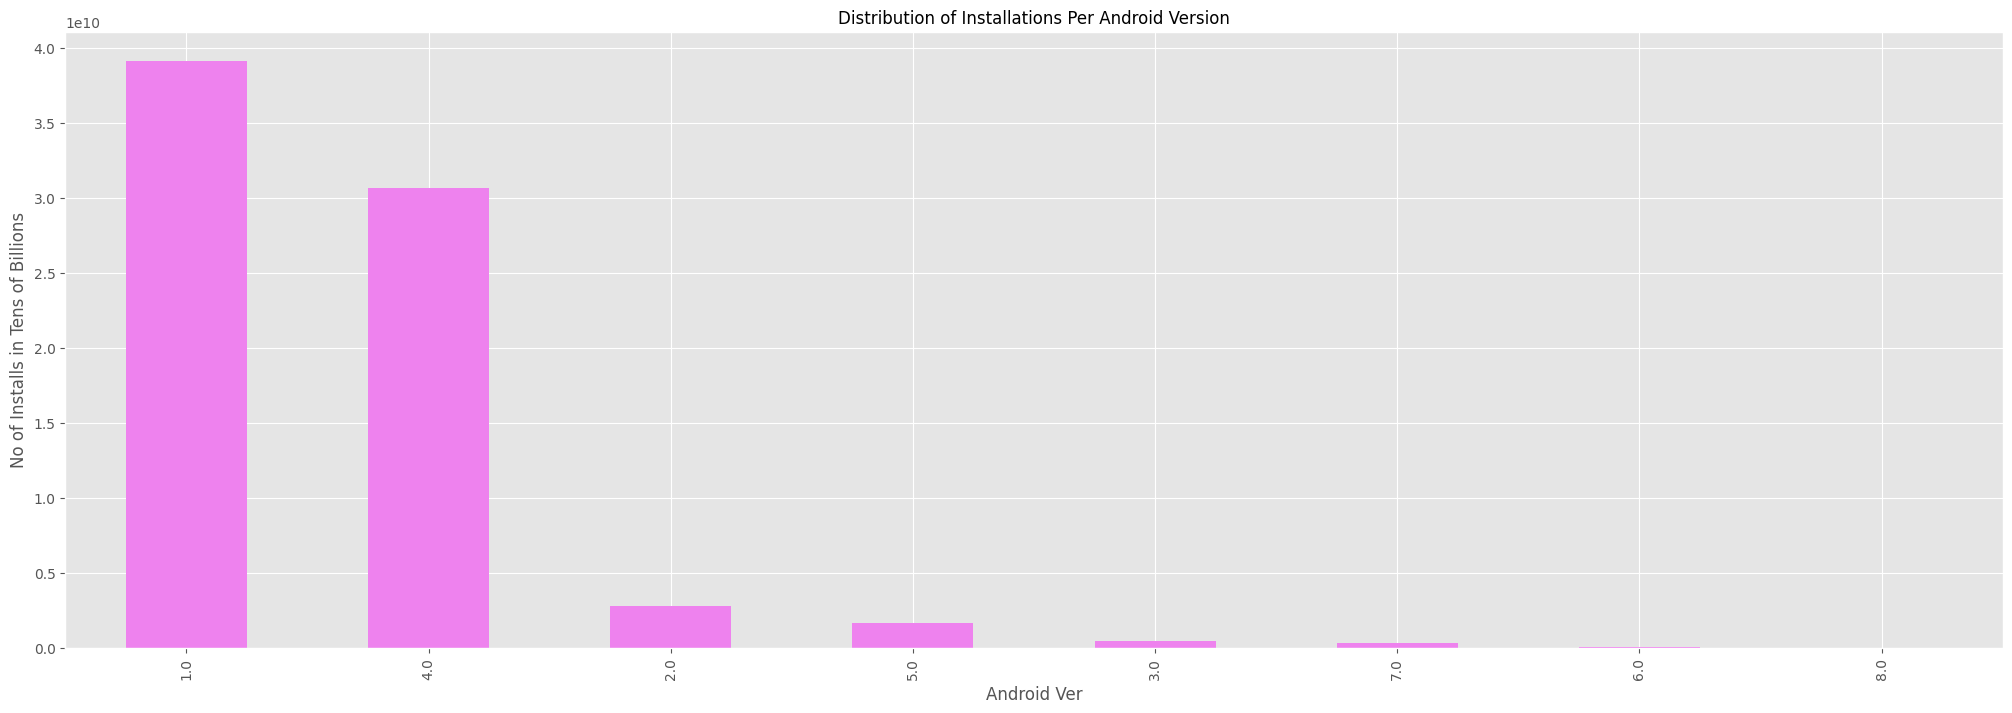

In [306]:
print(df.groupby('Android Ver')['Installs'].sum().sort_values(ascending=False))
df.groupby('Android Ver')['Installs'].sum().sort_values(ascending=False).plot.bar(figsize=(25,8), color='violet')
plt.title('Distribution of Installations Per Android Version',size=12)
plt.ylabel('No of Installs in Tens of Billions' )
plt.xticks()
plt.show()

Here, we can see that most Installed Apps are of Android Version 1.0 and 4.0.

In [263]:
pf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


## What is the Percentage of Review Sentiments??

In [264]:
pf_n= pf['Sentiment'].value_counts()

In [265]:
type(pf_n)

pandas.core.series.Series

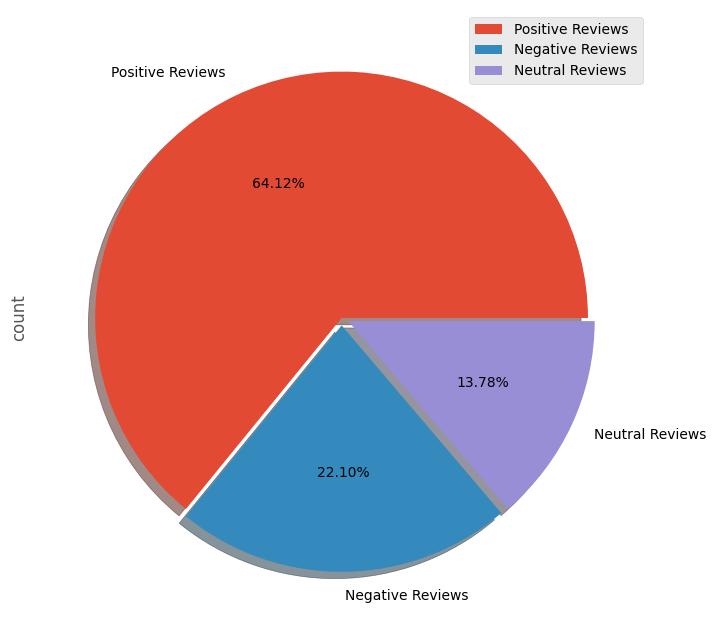

In [266]:
plt.figure(figsize=(18,8))
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
pf_n.plot(kind='pie', shadow=True, autopct="%.2f%%", labels=labels, explode=[0.0,0.03,0.03])
plt.legend(loc='upper right')

1. Positive reviews are **64.30%**
2. Negative reviews are **22.80%**
3. Neutral reviews are **12.90%**

## What are the Apps with the highest number of positive reviews & negative reviews?

In [267]:
# positive reviews
pos_pf=pf[pf['Sentiment']=='Positive']
pos_pf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [268]:
#negative reviews
neg_pf=pf[pf['Sentiment']=='Negative']
neg_pf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


Text(0, 0.5, 'Total number of nega reviews')

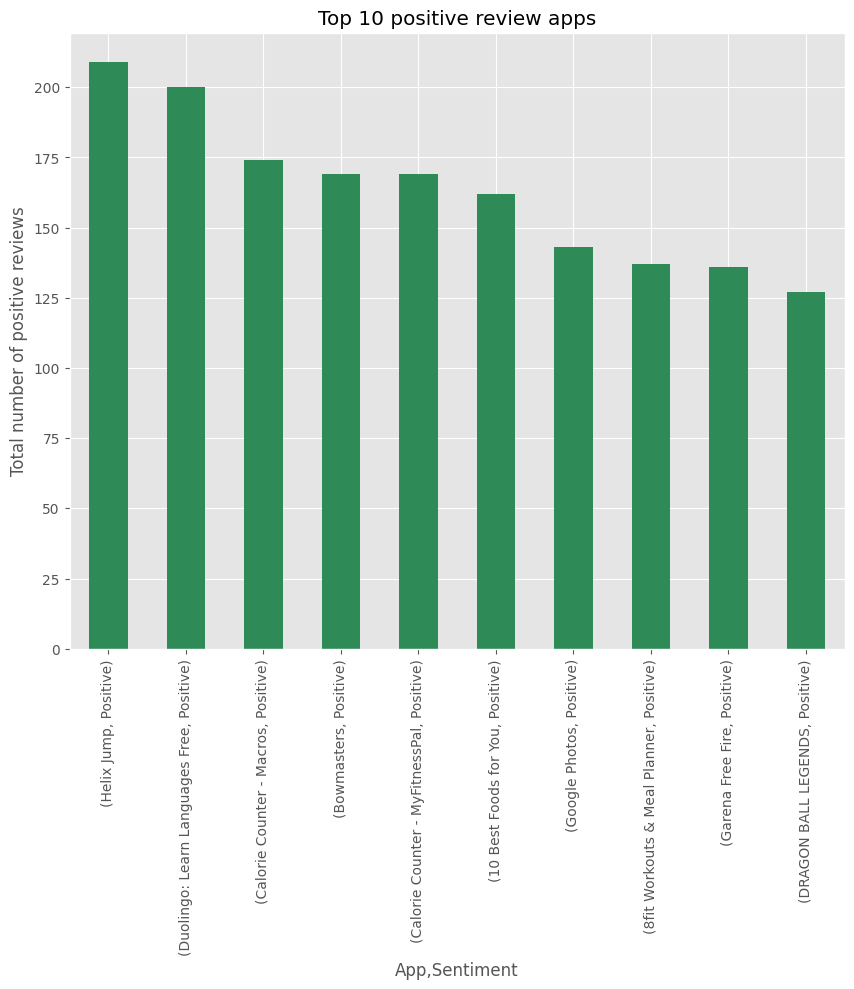

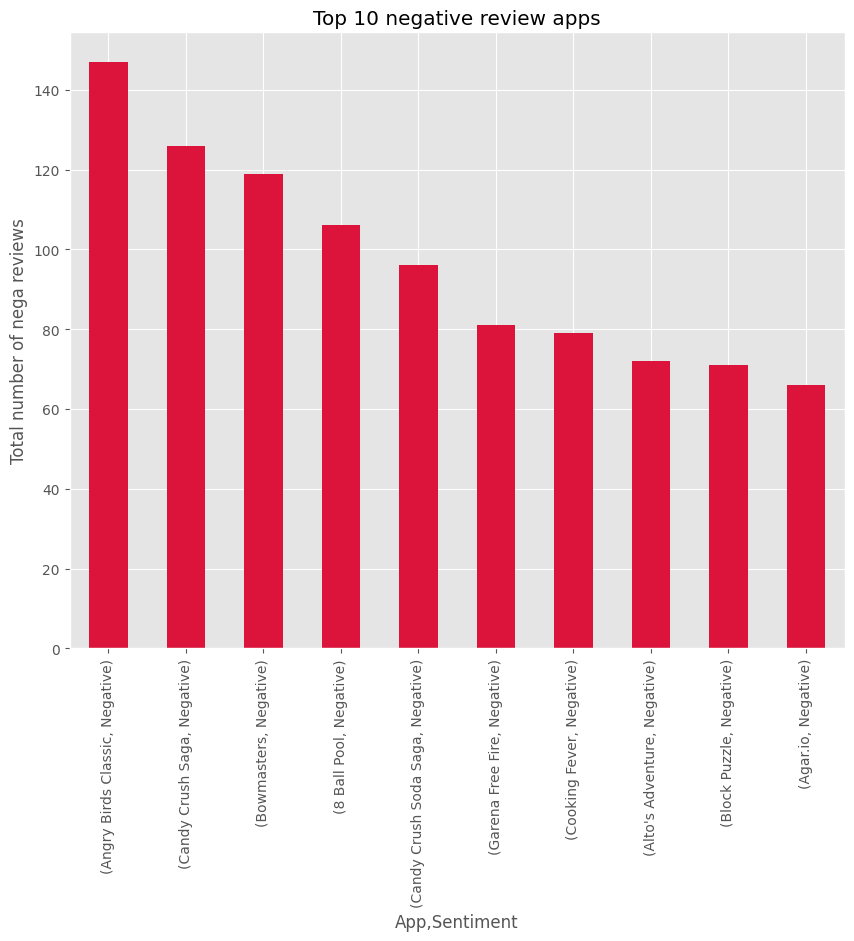

In [269]:
# fig, axes = plt.subplots(1, 2, sharey= True)

(pos_pf.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(10,8),color='seagreen'))
plt.title("Top 10 positive review apps")
plt.ylabel('Total number of positive reviews')

plt.figure(figsize=(10,8))
(neg_pf.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(10,8),color='crimson'))
plt.title("Top 10 negative review apps")
plt.ylabel('Total number of nega reviews')

## What's the Distribution of Sentiment Subjectivity for the Playstore Applications Reviews??

In [270]:
pf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Text(0.5, 0, 'Subjectivity')

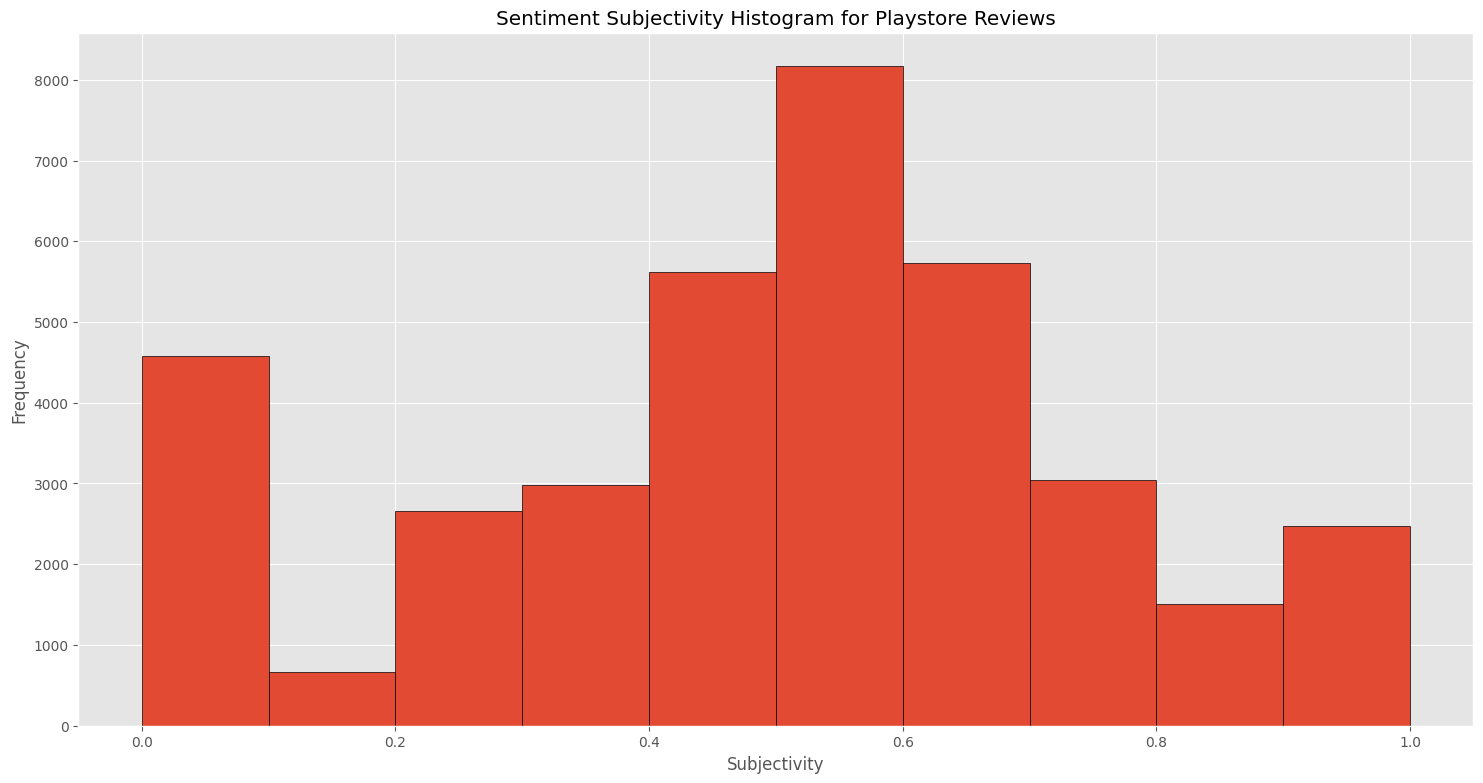

In [271]:
plt.figure(figsize=(18,9))
pf['Sentiment_Subjectivity'].plot(kind='hist', edgecolor='black')
plt.title('Sentiment Subjectivity Histogram for Playstore Reviews')
plt.xlabel('Subjectivity')

**`0 - objective(fact), 1 - subjective(opinion)`**

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

## What is Distribution of App update over the Year?

In [272]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_vise,size_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0,4-5,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,3-4,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0,4-5,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.0,4-5,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.0,4-5,1-10


In [273]:
df["Update year"] = df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
# free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

In [274]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_vise,size_group,Update year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0,4-5,10-20,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,3-4,10-20,2018


Text(0, 0.5, 'No of Apps')

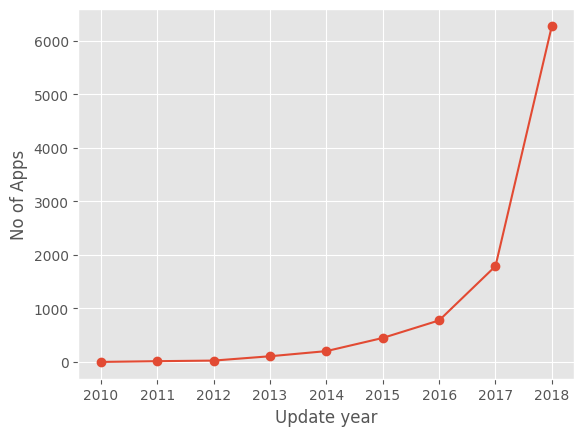

In [307]:
df.groupby('Update year')['App'].count().plot.line(marker='o')
plt.ylabel('No of Apps')

Here we can see the most apps Last Updated year is 2018. So we can say, Users will like the apps having the latest update.

## What is the distribution of App Installations over the Last Updated years??

In [276]:
df_n= df.groupby('Update year')['Installs'].sum().reset_index()

# df_n = df_n.set_index('Installs')
# df_n = df_n.transpose()
df_n

,Update year,Installs
0,2010,100000
1,2011,17407100
2,2012,13992210
3,2013,102086365
4,2014,269785226
5,2015,405339475
6,2016,1292365683
7,2017,2892589739
8,2018,70127694619


Text(0.5, 0, 'Years')

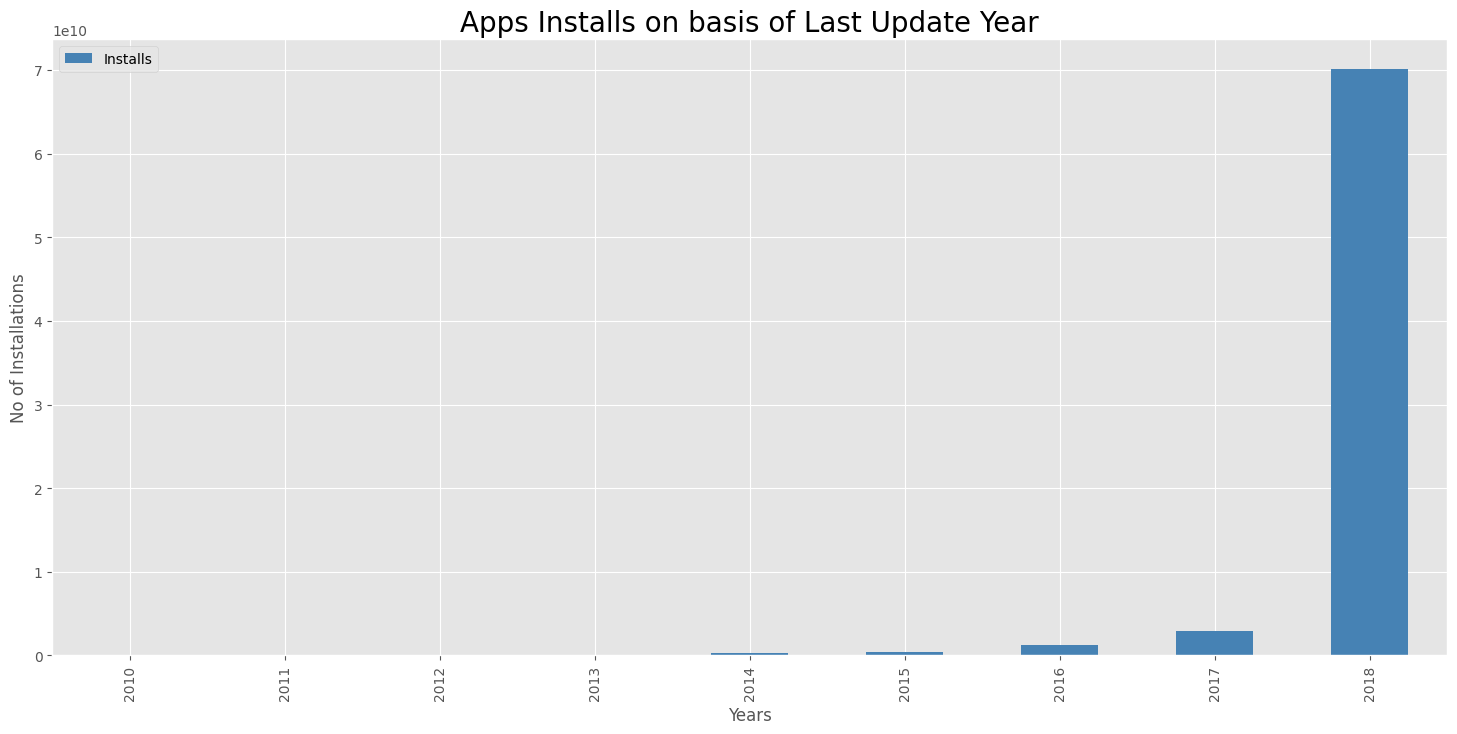

In [277]:
ax = df_n.plot(x='Update year', kind='bar', figsize=(18, 8), color='steelblue')

ax.set_title('Apps Installs on basis of Last Update Year', size=20)
ax.set_ylabel('No of Installations')
ax.set_xlabel('Years')

Here we found that, the most Installed Apps by Playstore Users are of year 2018. So, the Latest the Update an app have the more it will be liked by users.

## Analysis Summary

In this project of analyzing play store applications, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.
We need to:

1. Developing apps related to the Least Category having more number of Installations. Like Communication & Video_Players
2. Most of the apps are Free, so focusing on free app is more important.
3. Focusing more on content available for Everyone will increase the chances of getting the highest installs.
4. They need to focus on updating their apps regularly, so that it will attract more users as the latest update the app have, the higher rating it will receive. Apps having latest Updates are also Installed most.
5. They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.
6. Developing Apps on based on Adroid Version 1.0 and 4.0.
   
* Percentage of free apps = ~92%
  
* Percentage of apps with no age restrictions = ~82%
  
* Most competitive category: Family. So making app on Family category will not be a good decision.
* Category with the highest average app installs: Game
  
* Game, Communication and Tools are top three categories having 13878924415, 11038276251 and 8001271905 number of Installation.
  
* Communication, Tools, Productivity and Social are the Top Genre Apps having most number of Installations.
  
* Communicate & Tools Category/Genre Apps are most Popular as they are installed more both Genre Wise as well as Category Wise.
  
* 8783 Apps are having size less than 50 MB.
  
* 80.22% of Apps are having rating more than 4.0 including both type of apps.
  
* Apps like Facebook, Skype, Subway Surfers are the top most Installed Apps having count of 1 Billion Installations.
  
* Free type apps have more rating as well as higher rating as comparison to Paid type Apps.
  
* The Most Installed Android version apps are of 1.0 Version and then 4.0 Version. However, most of the Playstore Apps are build
on Android Version 4.0. So, this should be put in consideration.

* The median size of all apps in the play store is 12.0 MB. 
  
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.
  
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.